In [204]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import sklearn.datasets
import sklearn.linear_model
import matplotlib
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)

# 绘图
'''
X = [[1,2], 输入数据
    [3,4],
    [5,6]]
y = [1,2,3] 标签值
y2 = pred_fn(X) 估计值
'''
def plot_decision_boundary(X, y, fnn):
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    ds=SupervisedDataSet(2,1)
    for x in np.c_[xx.ravel(), yy.ravel()]:
        ds.addSample(x, [0,])
    Z = fnn.activateOnDataset(ds)
    if Z.shape[1] == 2:
        Z = Z[:,0].ravel() / (Z[:,1].ravel() + Z[:,0].ravel())
    print xx.shape, Z.shape
    Z = Z.reshape(xx.shape)
    
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    cbar = plt.gcf().colorbar(cs, ticks=np.arange(-1,2,0.25))
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)

def normalize(x):
    xmin = x.min()
    return (x - xmin) * 1.0 / (x.max() - xmin)



In [219]:
# 黑盒优化
def objF(x): return sum(x**2+x**4+1) # 优化目标函数，其中x是一个vector
x0 = np.array([2.1, -100]) # 初始值，x赋值为一个二维向量

from pybrain.optimization import CMAES
l = CMAES(objF, x0, minimize=True) # 优化为最小值
l.maxEvaluations = 8000
res, fitness = l.learn() # res为目标函数取得最小值时的x取值
print res, objF(res), fitness # 打印出最优输入，最有输入计算得到的最小值


[  6.93641352e-09   3.01088167e-09] 2.0 2.0


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:39: DeprecationWarning: numpy boolean subtract, the `-` operator, is deprecated, use the bitwise_xor, the `^` operator, or the logical_xor function instead.


(20, 20) (400, 1)


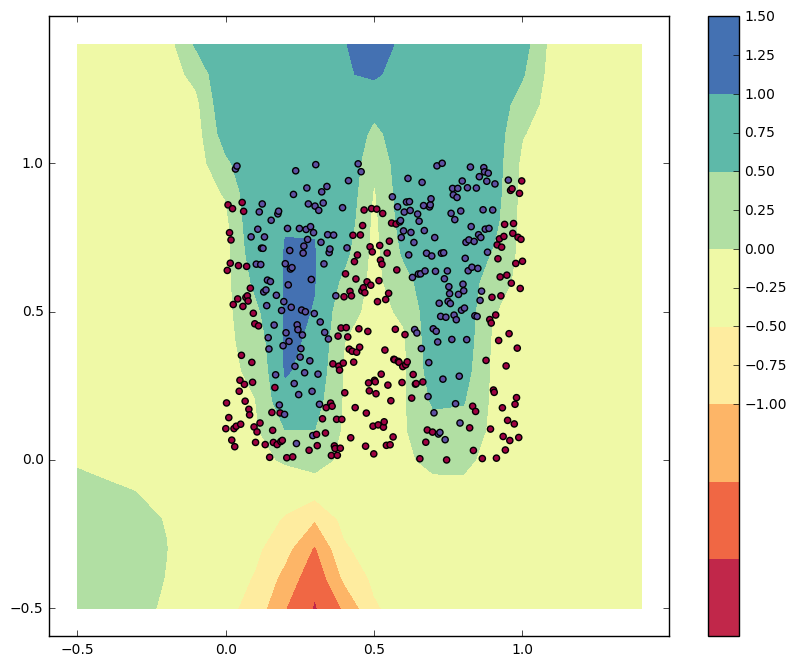

In [218]:
import numpy as np  
from pybrain.datasets import SupervisedDataSet  
from pybrain.supervised.trainers import BackpropTrainer  
from pybrain.tools.shortcuts import buildNetwork  
from pybrain.structure.modules import TanhLayer  

# 准备数据
C = 400
X = np.linspace(0,np.pi*4,C)
Y= np.random.uniform(-1, 1, C) #第二个自变量向量
label= Y > np.cos(X)#因变量

train= normalize(X) #第一个自变量向量  
train2 = normalize(Y)
label = normalize(label)

ds=SupervisedDataSet(2,1)
for i in range(len(train)):
    ds.addSample([train[i], train2[i]],[label[i]])

# 创建并训练神经网络
# hidden_layer都是100个神经元就可以分出来，200个就不行了，不知道为什么！
fnn=buildNetwork(2,10,10,1,bias=True)#第一个2是输入层的数据元（简单理解为有几个变量吧),第四个1是输出层的数据元（简单理解为因变量的个数）  
trainer=BackpropTrainer(fnn,ds,momentum=0.5, verbose=False,learningrate=0.1)  
trainer.trainEpochs(epochs=1000)#迭代次数达到1000的时候就过拟合了，分类边界出现抖动，500的时候还欠拟合
X = np.hstack([train.reshape(train.shape[0], 1), train2.reshape(train.shape[0], 1)])
plot_decision_boundary(X, label, fnn)
plt.show()

[ 1.09654234] 1.0
(16, 20) (320, 1)


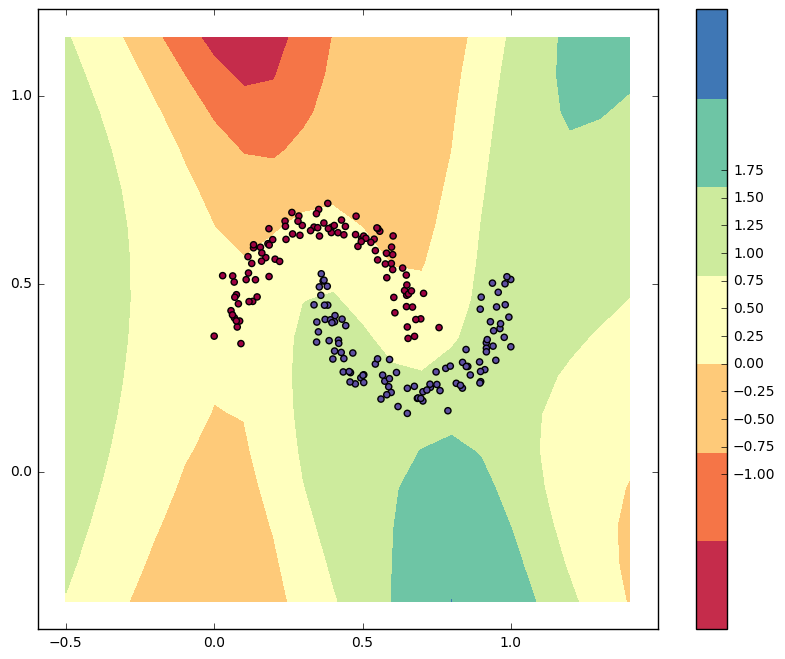

In [206]:

from pybrain.datasets import SupervisedDataSet 

# 创建并训练神经网络
fnn=buildNetwork(2,30,1,bias=True)#第一个2是输入层的数据元（简单理解为有几个变量吧),第四个1是输出层的数据元（简单理解为因变量的个数）  

X, y = sklearn.datasets.make_moons(200, noise=0.1)
X = normalize(np.array(X[:C]))
y = normalize(np.array(y[:C]))
ds = SupervisedDataSet(2, 1)
for i in range(len(y)):
    ds.addSample(X[i,:], [y[i]])
trainer=BackpropTrainer(fnn,ds,momentum=0.99, verbose=False,learningrate=0.002)  
for i in range(1000):
    trainer.train()
#trainer.trainUntilConvergence(maxEpochs=200)#迭代次数

print fnn.activate(X[0]), y[0]

plot_decision_boundary(X, y, fnn)
plt.show()

In [171]:
# 训练亦或分类器

from pybrain.datasets import SupervisedDataSet
from pybrain.tools.shortcuts import buildNetwork
from pybrain.supervised.trainers import BackpropTrainer
import random

ds = SupervisedDataSet(2, 1)
ds.addSample((1,0),(1,))
ds.addSample((1,1),(0,))
ds.addSample((0,0),(0,))
ds.addSample((0,1),(1,))
net = buildNetwork(2, 4, 1)

trainer = BackpropTrainer(net, ds, momentum=0.99, learningrate=0.01)
for i in range(1000):
    trainer.train()

for input, target in ds:
    print input, target, net.activate(input)

[ 1.  0.] [ 1.] [ 1.00014149]
[ 1.  1.] [ 0.] [ 0.0012661]
[ 0.  0.] [ 0.] [ 0.00048662]
[ 0.  1.] [ 1.] [ 1.00001548]
